## Model of Gaseous 3He Using Given Parameters

### Alya Sharbaugh, Spring 2022


The goal of this Jupyter notebook is to use the gaseous 3He response parameters and function from Beimer et al (1985) to generate various randomized yet realistic low energy spectra. Link: https://www.academia.edu/13609689/Response_function_for_3He_neutron_spectrometers

 - Import libraries and paper data from .csv
 - Write function that mimics the response parameter function in paper
 - Create fixed plot using given values
 - Create randomized plot using function as the distribution

In [109]:
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
from scipy import special
import math

#libraries for reading csv
import csv
import pandas as pd

In [110]:
#reading in csv file with parameters from Beimer et al
fixed_data = pd.read_csv("data/3He-Response-Parameters.csv")

df = pd.DataFrame(fixed_data)

parameter_list = df.values.tolist()
energy130keV = parameter_list[6]

print(energy130keV)

[540.5, 0.0046, 1310.0, 5.33, 1.23, 11.6, 0.000259, 330.0, 0.00502, 9.82, 1.92e-06, 1.92e-06, 1.92e-06, 1.92e-06, 1.92e-06, 1.92e-06, 1.92e-06, 1.92e-06]


In [111]:
#testing ERFC
En = 130.3
E = 1000
A3 = 6.34

ERFC = 0.5*special.erfc(1-(((En+764)-E)/A3))

print(ERFC)

3.746232717018042e-138


### Translating 3He response parameter function

In [121]:
#defining the response function
def response_function(energy, neutron_energy, data): 
    
    E = energy
    En = neutron_energy
    
    A1 = data[1]
    A2 = data[2]
    A3 = data[3]
    A4 = data[4]
    A5 = data[5]
    A6 = data[6]
    A7 = data[7]
    A8 = data[8]
    A9 = data[9]
    A11 = data[10]
    A12 = data[11]
    A13 = data[12]
    A14 = data[13]
    A15 = data[14]
    A16 = data[15]
    A17 = data[16]
    A18 = data[17]
    
    #print(A1, A2, A3, A4, A5, A6, A7, A8, A9, A11, A12, A13, A14, A15, A16, A17, A18)
    
    #creating empty delta values
    delta1 = int()
    delta2 = int()
    
    #ERFC 
    ERFC = 0.5*special.erfc(1-(((En+764)-E)/A3))
    #print(ERFC)
    
    #filling delta values 
    if E <= (En + 764):
        delta1 = 1
        delta2 = 0
    if E > (En + 764):
        delta1 = 0
        delta2 = 1
        
    response = (A6*(math.exp(-(((En+764)-E)/A7)))*ERFC) + (A1*A4*(math.exp(-(((En+764)-E)/A5))*ERFC)) + \
               (delta1*A1*(math.exp(-(0.5*((En+764)-E)/A3)**2))) + (delta2*A8*(math.exp(-(0.5*((En+764)-E)/A9)**2)))
    
   # response = (((A17*(E-A18))+A16)/(1+math.exp((E-A18)/A15))) + (((A11*(A13-E)+A12))/(1+math.exp((E-A13)/A14))) + \
    #            (A6*(math.exp(-(((En+764)-E)/A7)))*ERFC) + (A1*A4*(math.exp(-(((En+764)-E)/A5))*ERFC)) + \
     #           (delta1*A1*(math.exp(-(0.5*((En+764)-E)/A3)**2))) + (delta2*A8*(math.exp(-(0.5*((En+764)-E)/A9)**2)))
    

    return response
    

### Making a Fixed Plot Using Imported Values

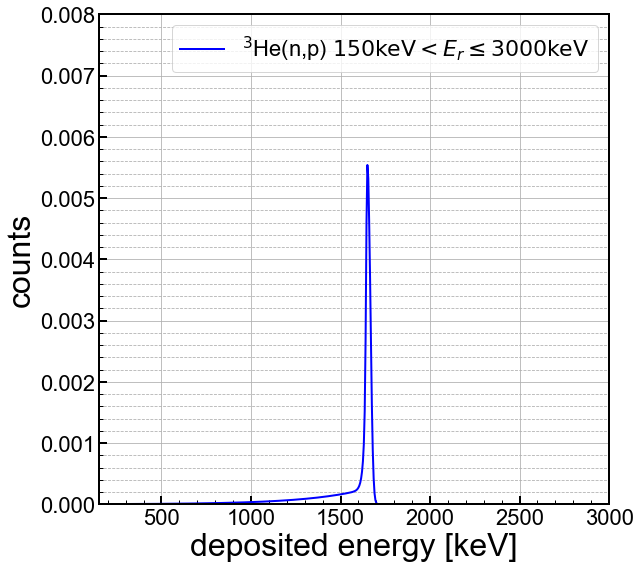

In [125]:
#declaring relevant variables
En = 890.1
Emin = 150
Emax = 3000
step = 5
plot_yvalues = []

#solving response_function for energies in range from 0-1000 keV
for energy in range(Emin, Emax, step):
    result = int()
    result = response_function(energy, En, energy130keV)
    plot_yvalues.append(result)

#print(plot_yvalues)

#setting up a 1d plot and plotting using response_function

energy = np.arange(Emin, Emax, step)
#print(energy)

fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

estring = r'${}\mathrm{{keV}}< E_r \leq {}\mathrm{{keV}}$'.format(Emin,Emax)
ax1.plot(energy, plot_yvalues,color='b', linestyle='-', label='$^3$He(n,p) {}'.format(estring), linewidth=2)

blue = '#118DFA'

#ax1.fill_between(energy,np.zeros(np.shape(xcq)),En,step='mid',facecolor='m',alpha=0.4, label='')
#ax1.axvline(Q,color='k',linestyle='--',linewidth=2,label='Q-value')

ymin = 0.0
ymax = 0.008

ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(Emin, Emax) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'deposited energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/L3He-Gauss.png')
plt.show()

### Making a Variable Plot Using Randomly Generated Values

In [ ]:
#randomly generating data to put in distribution

In [ ]:
#plotting using response_function